In [1]:
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from tensorflow import keras
import numpy as np


In [2]:
image_directory = r'FBLaK/'
SIZE = 10
dataset = [] 
label = []  

IMG_DIR = os.listdir(image_directory )
for i in IMG_DIR:
    for j in os.listdir(image_directory+ i):
        image = cv2.imread(image_directory+ i+'/'+j)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(i)

In [4]:
dataset=np.array(dataset)
label=np.array(label)
print(dataset.shape)
print(label.shape)


(336, 10, 10, 3)
(336,)


In [5]:
INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)
conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), 
                               activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.1)(norm1)
flat = keras.layers.Flatten()(drop1)  
hidden1 = keras.layers.Dense(32, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(32, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)
out = keras.layers.Dense(3, activation='softmax')(drop4)  

model = keras.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 10, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 10, 10, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 32)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 5, 32)          128       
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632 

In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

label_encoder = LabelEncoder()
vectr = label_encoder.fit_transform(label)
print(vectr[0:400])


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, vectr, test_size=0.2, random_state=0)
label_ct_train=to_categorical(y_train)
label_ct_test=to_categorical(y_test)
print(label_ct_train.shape)
print(X_train.shape)
print(label_ct_train[0:10])

(268, 3)
(268, 10, 10, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [9]:
history = model.fit(X_test, label_ct_test, verbose = 1, batch_size=32 ,epochs =50,validation_split = 0.2, shuffle = True )

Epoch 1/50
2/2 [==============================] - 2s 912ms/step - loss: 1.3814 - accuracy: 0.3530 - val_loss: 5.8745 - val_accuracy: 0.2857
Epoch 2/50
2/2 [==============================] - 0s 40ms/step - loss: 0.6283 - accuracy: 0.7458 - val_loss: 4.0272 - val_accuracy: 0.2857
Epoch 3/50
2/2 [==============================] - 0s 41ms/step - loss: 0.3928 - accuracy: 0.8368 - val_loss: 3.7710 - val_accuracy: 0.4286
Epoch 4/50
2/2 [==============================] - 0s 39ms/step - loss: 0.4255 - accuracy: 0.8843 - val_loss: 4.1571 - val_accuracy: 0.4286
Epoch 5/50
2/2 [==============================] - 0s 41ms/step - loss: 0.3314 - accuracy: 0.8843 - val_loss: 4.3185 - val_accuracy: 0.4286
Epoch 6/50
2/2 [==============================] - 0s 42ms/step - loss: 0.2343 - accuracy: 0.9753 - val_loss: 4.3862 - val_accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 41ms/step - loss: 0.2011 - accuracy: 0.9649 - val_loss: 4.4557 - val_accuracy: 0.5000
Epoch 8/50
2/2 [==========

In [10]:
#trainig
from sklearn.metrics import confusion_matrix
y_probability=model.predict(X_train)
y_pred=np.argmax(y_probability,axis=1)

CM=confusion_matrix(y_train, y_pred)
print(CM)

[[ 56   0  20]
 [  0 127   0]
 [  0   0  65]]


In [11]:
#trainig
from sklearn.metrics import confusion_matrix
y_probability2=model.predict(X_test)
y_pred2=np.argmax(y_probability2,axis=1)

CM2=confusion_matrix(y_test, y_pred2)
print(CM2)

[[21  0  3]
 [ 0 25  0]
 [ 0  0 19]]


In [12]:
model.save('TrainedModel.h5')

In [13]:
TestImage='7.tif'
Timage = cv2.imread(r'Test/'+TestImage)
Timage = Image.fromarray(Timage, 'RGB')


In [14]:
f=2;
IMG = Timage.resize((500*f, 500*f))
IMG=np.array(IMG)
print(IMG[10,50,2])
IMG.shape

55


(1000, 1000, 3)

In [15]:
Box=np.empty((2500*f*f,10,10,3))
for j in range(50*f):
    for i in range(50*f):
        Box[j*50*f+i,:,:,:]=IMG[10*j:(j+1)*10,10*i:(i+1)*10,:]
print(Box.shape)
Box[1500,9,9,1]

(10000, 10, 10, 3)


77.0

In [16]:
y_probability=model.predict(Box)
y_pred=np.argmax(y_probability,axis=1)
print(y_probability[0:10])
y_pred[0:10]

[[0.8411028  0.03898836 0.11990891]
 [0.8625838  0.04794669 0.08946948]
 [0.89122194 0.04500865 0.06376943]
 [0.883933   0.05769784 0.05836918]
 [0.8394693  0.08838846 0.07214221]
 [0.75068355 0.04766962 0.20164688]
 [0.87199885 0.04377076 0.0842303 ]
 [0.8701775  0.04921497 0.08060752]
 [0.88024986 0.03910829 0.08064185]
 [0.60142326 0.05166594 0.3469108 ]]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
print('number of forest Segments:', sum(y_pred==0))
print('number of sea segments:',sum(y_pred==1))
print('number of urban segments:', sum(y_pred==2))
print('total segments:',sum(y_pred==0)+sum(y_pred==1)+sum(y_pred==2))

number of forest Segments: 4925
number of sea segments: 2914
number of urban segments: 2161
total segments: 10000


In [18]:
blue = np.zeros((10, 10, 3), np.uint8)
green = np.zeros((10, 10, 3), np.uint8)
white =np.zeros((10, 10, 3), np.uint8)

white[:]=(240,240,240)
green[:] = (0, 225, 0)
blue[:] = (0, 0, 250)


<class 'numpy.ndarray'>
(1000, 1000, 3)


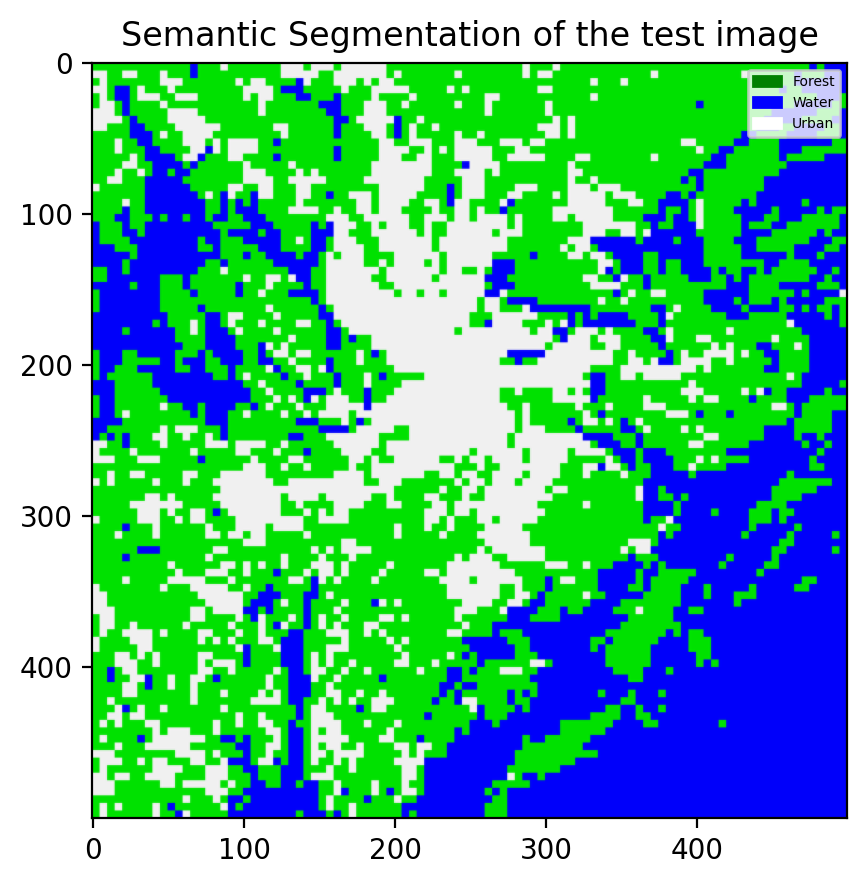

In [19]:
Semantic_Segmentation=np.empty((500*f,500*f,3))
for j in range(50*f):
    for i in range(50*f):
        if y_pred[j*50*f+i]==0:
            Semantic_Segmentation[10*j:(j+1)*10, 10*i:(i+1)*10]=green;
        if y_pred[j*50*f+i]==1:
            Semantic_Segmentation[10*j:(j+1)*10, 10*i:(i+1)*10]=blue;
        if y_pred[j*50*f+i]==2:
            Semantic_Segmentation[10*j:(j+1)*10, 10*i:(i+1)*10]=white;            
print(type(Semantic_Segmentation))
plt.figure(figsize=(5,5), dpi=200)
plt.style.use('default')
import matplotlib.patches as mpatches
GNColor = mpatches.Patch(color='green', label='Forest')
BLColor = mpatches.Patch(color='blue', label='Water')
WHTColor= mpatches.Patch(color='white', label='Urban')
plt.legend(handles=[GNColor,BLColor,WHTColor],prop={'size': 5})
#plot.legend()
plt.title('Semantic Segmentation of the test image')

print(Semantic_Segmentation.shape)
img = Image.fromarray(Semantic_Segmentation.astype('uint8'))
img=img.resize((500,500))
plt.imshow(img)

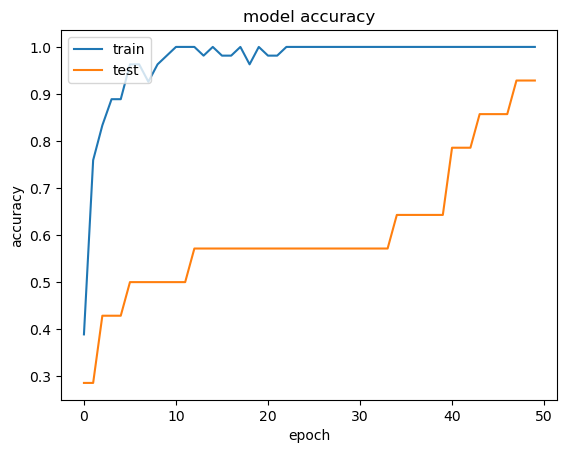

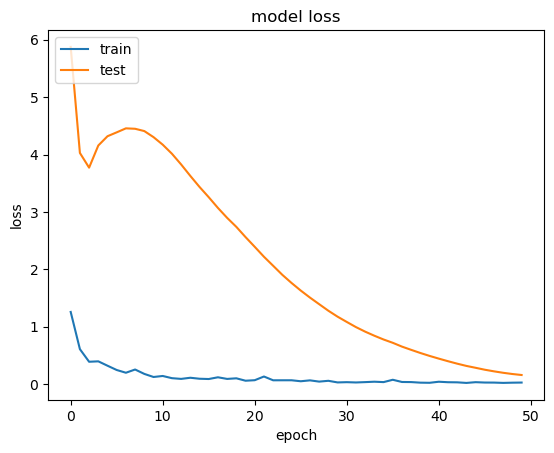

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()